In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

In [2]:
#loading file
churnData = pd.read_csv("file:///Users/DeLaLuna/Downloads/DATA_Customer-Churn.csv")


In [3]:
#checking data types
churnData.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#converting column to numeric value
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')



In [8]:
#converting to float value
churnData['TotalCharges'] = churnData['TotalCharges'].astype(np.float64)

In [10]:
#converting to float value
churnData['Churn'] = churnData['Churn'].astype(np.float64)

In [11]:
#checking df information
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory

In [5]:
 churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,1


In [12]:
#replacing null values with mean of given column 
churnData['TotalCharges'] =  churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))

In [13]:
#creating new dataframe with fewer columns
df = churnData[['TotalCharges', 'tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [14]:
df

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,29.85,1,0,29.85
1,1889.50,34,0,56.95
2,108.15,2,0,53.85
3,1840.75,45,0,42.30
4,151.65,2,0,70.70
...,...,...,...,...
7038,1990.50,24,0,84.80
7039,7362.90,72,0,103.20
7040,346.45,11,0,29.60
7041,306.60,4,1,74.40


Split the data into a training set and a test set.

In [17]:
X= df
y= churnData['Churn']

In [4]:
#turning object binary column into numeric binary column in preparation for ML
churnData['Churn'] = np.where(churnData['Churn'] == "No", 0, np.where(churnData['Churn'] == "Yes", 1, churnData['Churn']))



In [15]:
churnData['Churn'].value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [18]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [19]:
X

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,29.85,1,0,29.85
1,1889.50,34,0,56.95
2,108.15,2,0,53.85
3,1840.75,45,0,42.30
4,151.65,2,0,70.70
...,...,...,...,...
7038,1990.50,24,0,84.80
7039,7362.90,72,0,103.20
7040,346.45,11,0,29.60
7041,306.60,4,1,74.40


In [20]:
y.value_counts(normalize=True)

0.0    0.73463
1.0    0.26537
Name: Churn, dtype: float64

In [22]:
#splitting the data set
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [23]:
y_train

6586    0.0
2524    0.0
2776    1.0
3174    0.0
6700    0.0
       ... 
654     1.0
5371    1.0
729     0.0
5825    1.0
69      0.0
Name: Churn, Length: 5282, dtype: float64

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
#scaling the data
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

In [32]:
pt.fit(y_train.values.reshape(-1, 1))
y_train_transformed = pt.transform(y_train.values.reshape(-1, 1))
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1))



In [33]:
#running logistic regression model and accessing metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.789670,0.797019
1,Precision,0.648833,0.674242
2,Recall,0.447351,0.470899


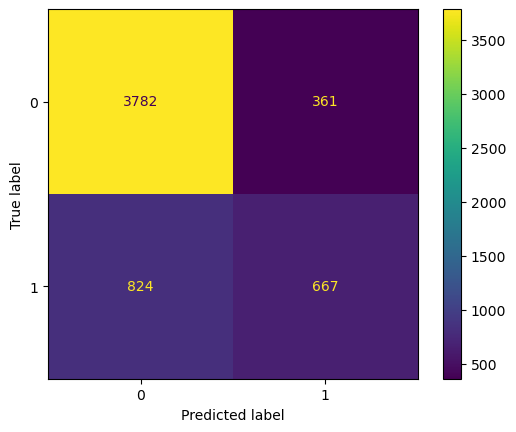

In [34]:
#plot confusion matrix on training data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train = confusion_matrix(y_train, y_pred_train_log, labels =log_model.classes_ )
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

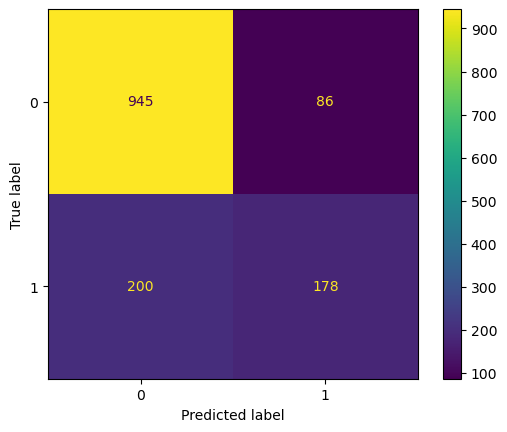

In [35]:
#plot confusion matrix on test data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train = confusion_matrix(y_test, y_pred_test_log, labels =log_model.classes_ )
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#fit and train KNN classifier model
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model here we are loading the training data
y_pred = model.predict(X_test) # predict test. here we adjusting the model based on the tain data inputted 
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [39]:
#function to generate performance metrics of the models
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize lists to store evaluation metrics
k_values = list(range(1, 21))
accuracy_scores = []
precision_scores = []
recall_scores = []

for k in k_values:
    # Create KNN classifier with current k value
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append the scores to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Print the evaluation metrics for each value of k
for k, accuracy, precision, recall in zip(k_values, accuracy_scores, precision_scores, recall_scores):
    print(f"K = {k}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")


K = 1: Accuracy = 0.7140, Precision = 0.4658, Recall = 0.4497
K = 2: Accuracy = 0.7544, Precision = 0.6067, Recall = 0.2407
K = 3: Accuracy = 0.7388, Precision = 0.5170, Recall = 0.4021
K = 4: Accuracy = 0.7644, Precision = 0.6264, Recall = 0.3016
K = 5: Accuracy = 0.7715, Precision = 0.6053, Recall = 0.4259
K = 6: Accuracy = 0.7750, Precision = 0.6597, Recall = 0.3333
K = 7: Accuracy = 0.7764, Precision = 0.6286, Recall = 0.4074
K = 8: Accuracy = 0.7835, Precision = 0.6931, Recall = 0.3466
K = 9: Accuracy = 0.7835, Precision = 0.6567, Recall = 0.4048
K = 10: Accuracy = 0.7828, Precision = 0.6978, Recall = 0.3360
K = 11: Accuracy = 0.7814, Precision = 0.6549, Recall = 0.3915
K = 12: Accuracy = 0.7842, Precision = 0.6947, Recall = 0.3492
K = 13: Accuracy = 0.7842, Precision = 0.6729, Recall = 0.3810
K = 14: Accuracy = 0.7864, Precision = 0.7081, Recall = 0.3466
K = 15: Accuracy = 0.7871, Precision = 0.6822, Recall = 0.3862
K = 16: Accuracy = 0.7835, Precision = 0.6952, Recall = 0.3439
K

In [40]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.83,0.77
1,Precision,0.74,0.61
2,Recall,0.57,0.43


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize lists to store the evaluation metrics
k_values = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# Iterate over different values of k
for k in range(1, 21):
    # Create and fit the KNN model
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    model.fit(X_train, y_train)
    
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)
   
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append the results to the lists
    k_values.append(k)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Print the evaluation metrics for each value of k
for k, accuracy, precision, recall in zip(k_values, accuracy_scores, precision_scores, recall_scores):
    print(f"K = {k}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")


K = 1: Accuracy = 0.7140, Precision = 0.4658, Recall = 0.4497
K = 2: Accuracy = 0.7544, Precision = 0.6067, Recall = 0.2407
K = 3: Accuracy = 0.7388, Precision = 0.5170, Recall = 0.4021
K = 4: Accuracy = 0.7644, Precision = 0.6264, Recall = 0.3016
K = 5: Accuracy = 0.7715, Precision = 0.6053, Recall = 0.4259
K = 6: Accuracy = 0.7750, Precision = 0.6597, Recall = 0.3333
K = 7: Accuracy = 0.7764, Precision = 0.6286, Recall = 0.4074
K = 8: Accuracy = 0.7835, Precision = 0.6931, Recall = 0.3466
K = 9: Accuracy = 0.7835, Precision = 0.6567, Recall = 0.4048
K = 10: Accuracy = 0.7828, Precision = 0.6978, Recall = 0.3360
K = 11: Accuracy = 0.7814, Precision = 0.6549, Recall = 0.3915
K = 12: Accuracy = 0.7842, Precision = 0.6947, Recall = 0.3492
K = 13: Accuracy = 0.7842, Precision = 0.6729, Recall = 0.3810
K = 14: Accuracy = 0.7864, Precision = 0.7081, Recall = 0.3466
K = 15: Accuracy = 0.7871, Precision = 0.6822, Recall = 0.3862
K = 16: Accuracy = 0.7835, Precision = 0.6952, Recall = 0.3439
K

In [71]:
X= df
y= churnData['Churn']

In [72]:
X

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,29.85,1,0,29.85
1,1889.50,34,0,56.95
2,108.15,2,0,53.85
3,1840.75,45,0,42.30
4,151.65,2,0,70.70
...,...,...,...,...
7038,1990.50,24,0,84.80
7039,7362.90,72,0,103.20
7040,346.45,11,0,29.60
7041,306.60,4,1,74.40


In [86]:
y = y.astype(np.int64)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [87]:
print(X.shape)
print(y.shape)

(7043, 4)
(7043,)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
model = DecisionTreeClassifier(max_depth=3)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)



In [115]:
k_values = []
accuracy_scores = []
precision_scores = []
recall_scores = []

for k in range (1,6):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
  
 
     # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
  
    # Append the results to the lists
    k_values.append(k)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
   
   
# Print the evaluation metrics for each value of k
for k, accuracy, precision, recall in zip(k_values, accuracy_scores, precision_scores, recall_scores):
    print(f"K = {k}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")
   
    


K = 1: Accuracy = 0.7058, Precision = 0.4611, Recall = 0.4823
K = 2: Accuracy = 0.7036, Precision = 0.4574, Recall = 0.4823
K = 3: Accuracy = 0.7115, Precision = 0.4706, Recall = 0.4843
K = 4: Accuracy = 0.7076, Precision = 0.4631, Recall = 0.4718
K = 5: Accuracy = 0.7115, Precision = 0.4709, Recall = 0.4906


In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'Predicted_value': y_pred_test})

    return performance, df_train, df_test

In [117]:
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

,Error_metric,Train,Test
0,Mean error,0.01,-0.01
1,Mean absolute error,0.01,0.29
2,Mean squared error,0.01,0.29
3,Root mean squared error,0.10,0.54
4,Mean absolute percentual error,inf,inf
5,R2,0.95,-0.46


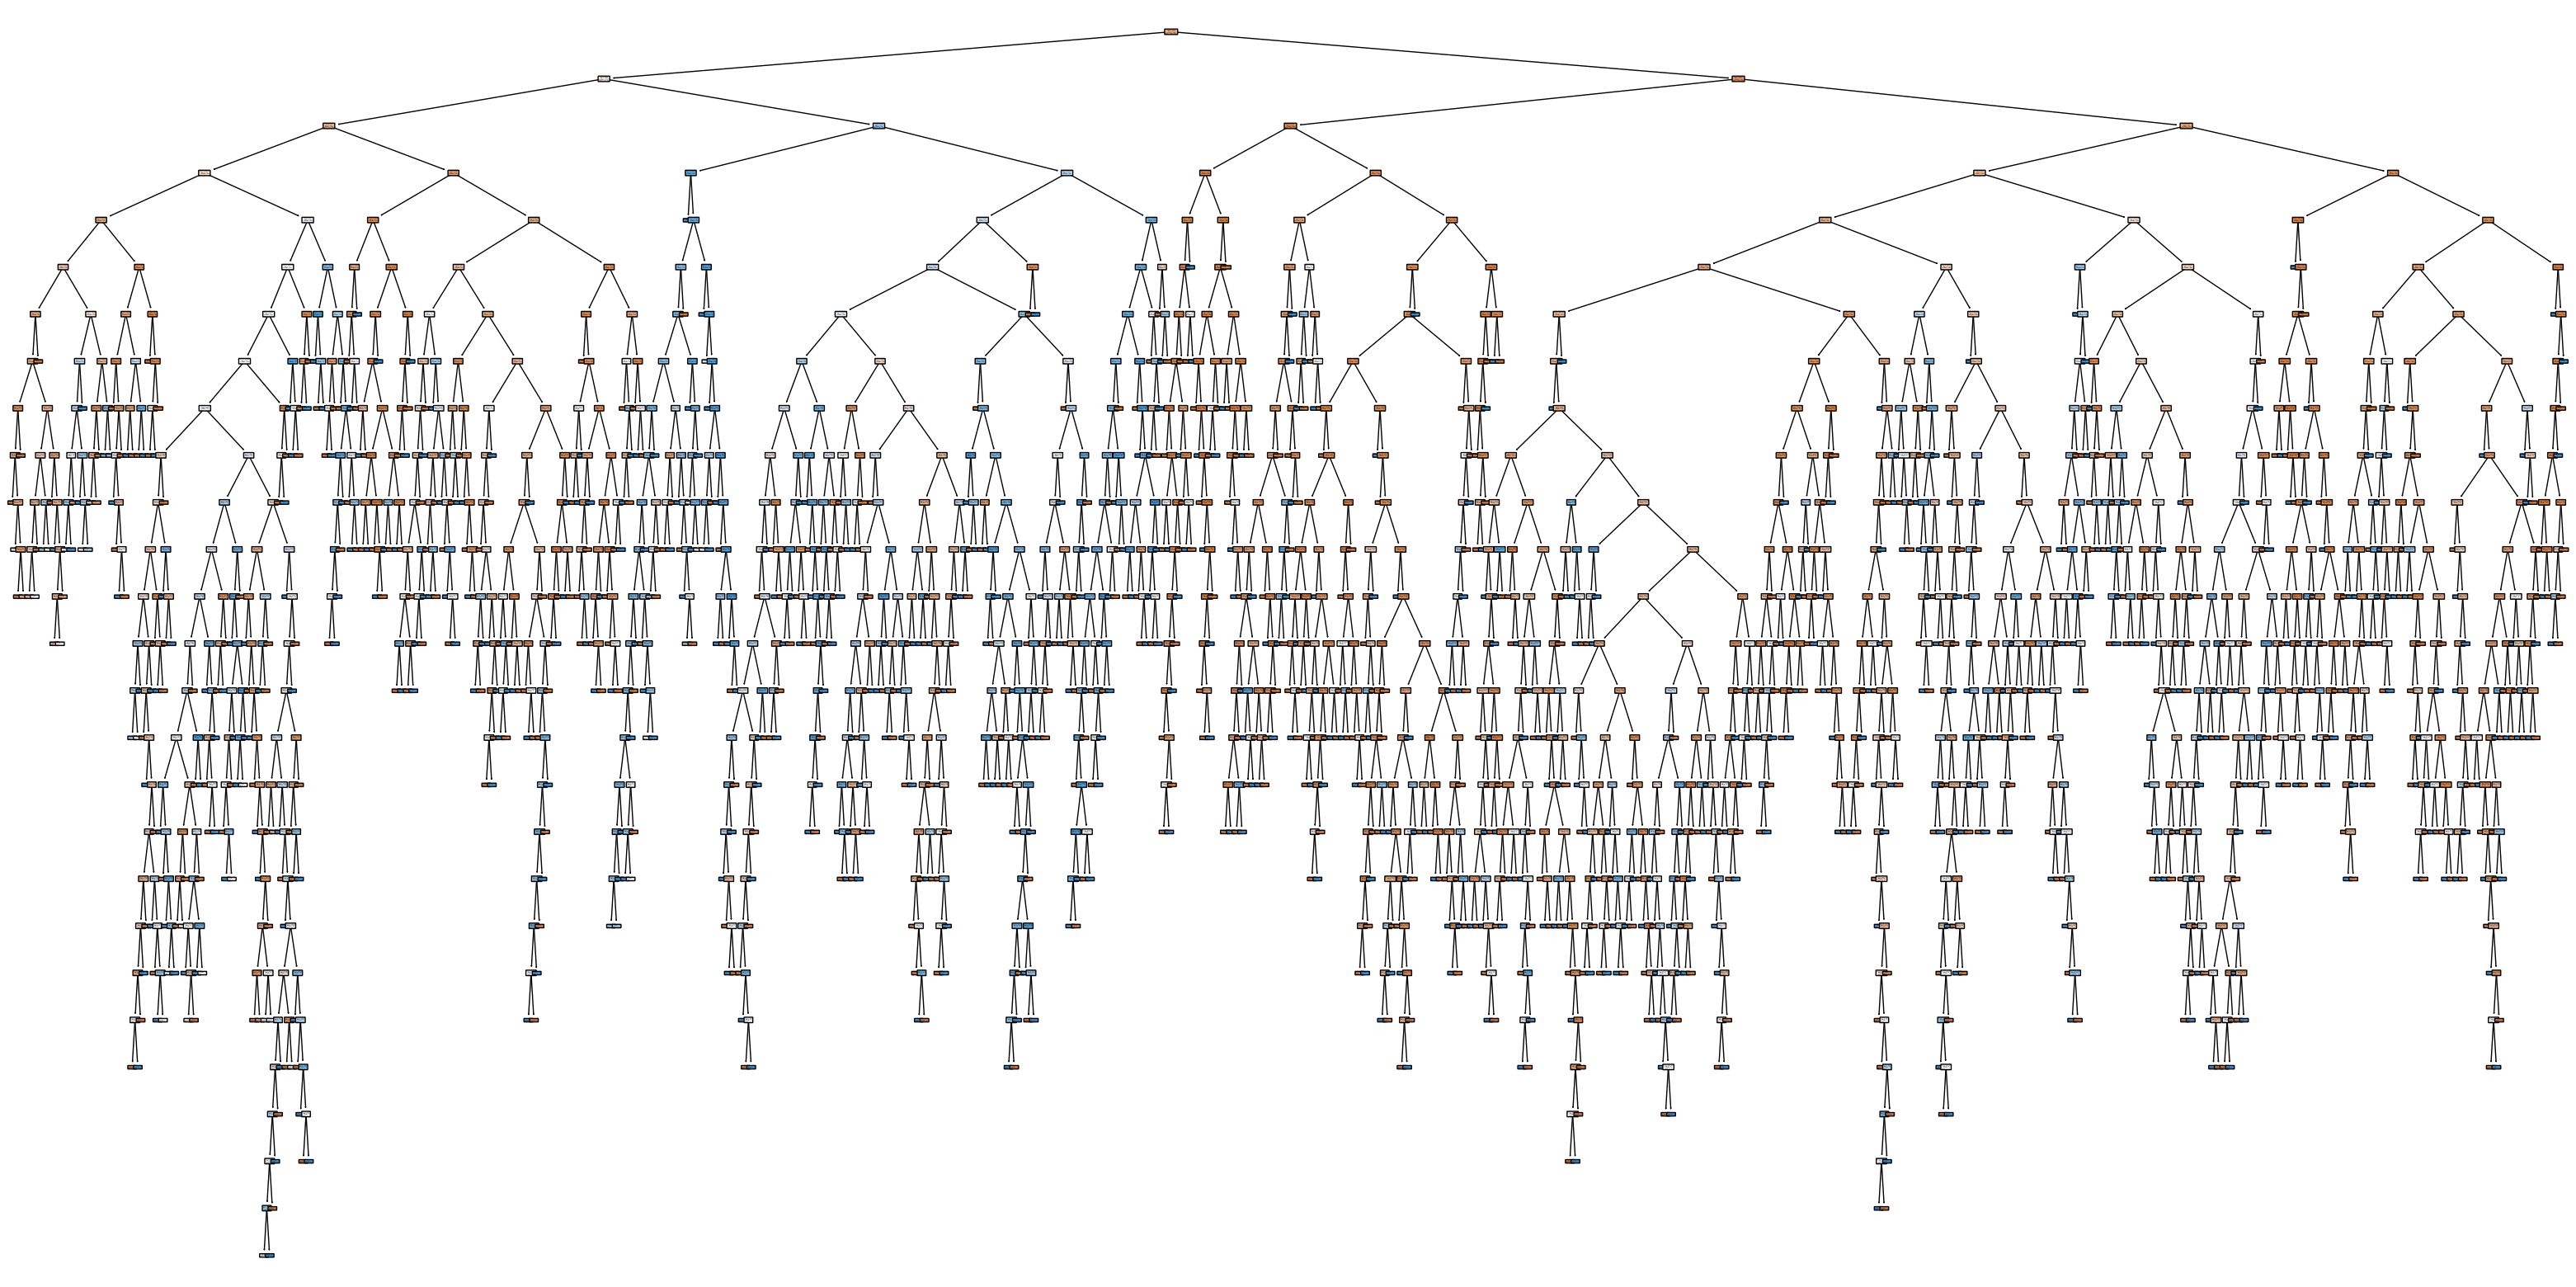

In [119]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20))

plot_tree(model,filled = True, rounded=True)
plt.show()

In [120]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing

from sklearn.datasets import load_iris

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [121]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7224563515954244, 'Logistic Regression': 0.7896607393710043, 'KNN': 0.7663754981221869}


In [122]:
X= df
y= churnData['Churn']

In [123]:
X

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,29.85,1,0,29.85
1,1889.50,34,0,56.95
2,108.15,2,0,53.85
3,1840.75,45,0,42.30
4,151.65,2,0,70.70
...,...,...,...,...
7038,1990.50,24,0,84.80
7039,7362.90,72,0,103.20
7040,346.45,11,0,29.60
7041,306.60,4,1,74.40


In [130]:
y.value_counts(normalize=False)

0.00    5174
1.00    1869
Name: Churn, dtype: int64

In [128]:
from imblearn.over_sampling import SMOTE

In [129]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0.00    5174
1.00    5174
Name: Churn, dtype: int64

In [133]:
X_sm

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,29.85,1,0,29.85
1,1889.50,34,0,56.95
2,108.15,2,0,53.85
3,1840.75,45,0,42.30
4,151.65,2,0,70.70
...,...,...,...,...
10343,586.21,7,0,82.39
10344,20.20,1,0,20.20
10345,759.38,9,0,85.17
10346,5509.86,55,1,101.97


In [135]:
y_sm

0       0.00
1       0.00
2       1.00
3       0.00
4       1.00
        ... 
10343   1.00
10344   1.00
10345   1.00
10346   1.00
10347   1.00
Name: Churn, Length: 10348, dtype: float64

In [166]:
#balanced data set using the SMOTE technique
Xy_sm = pd.concat([X_sm, y_sm], axis=1)
Xy_sm

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges,Churn
0,29.85,1,0,29.85,0.00
1,1889.50,34,0,56.95,0.00
2,108.15,2,0,53.85,1.00
3,1840.75,45,0,42.30,0.00
4,151.65,2,0,70.70,1.00
...,...,...,...,...,...
10343,586.21,7,0,82.39,1.00
10344,20.20,1,0,20.20,1.00
10345,759.38,9,0,85.17,1.00
10346,5509.86,55,1,101.97,1.00


In [146]:
X= df
y= churnData['Churn']

In [157]:
Xy = pd.concat([X,y],axis=1)



In [151]:
y.value_counts(normalize=False)

0.00    5174
1.00    1869
Name: Churn, dtype: int64

In [152]:
NEG_CLASS_CNT = 1869 # number of negative labels

In [158]:
category_0 = Xy[y == 0]
category_1 = Xy[y == 1]


In [159]:
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [160]:
c1_len = len(category_1)
c1_len

1869

In [161]:
# downsample the majority class to the size of the positive class using pandas sample method
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [173]:
# reassemble the data
Xy_down = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
Xy_down = Xy_down.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
Xy_down

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges,Churn
2668,19.75,1,0,19.75,1.00
6365,700.85,7,1,101.95,1.00
3347,454.00,23,0,20.90,0.00
5485,50.75,1,0,50.75,0.00
1370,538.20,27,0,20.25,0.00
...,...,...,...,...,...
1178,1553.95,15,0,101.35,1.00
1070,144.55,2,0,69.75,1.00
6159,38.25,2,0,20.50,0.00
1595,165.40,2,1,74.70,1.00


In [176]:
Xy_down = Xy_down.reset_index(drop=True)
#balanced df using downsize random sample method
Xy_down

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges,Churn
0,19.75,1,0,19.75,1.00
1,700.85,7,1,101.95,1.00
2,454.00,23,0,20.90,0.00
3,50.75,1,0,50.75,0.00
4,538.20,27,0,20.25,0.00
...,...,...,...,...,...
3733,1553.95,15,0,101.35,1.00
3734,144.55,2,0,69.75,1.00
3735,38.25,2,0,20.50,0.00
3736,165.40,2,1,74.70,1.00


In [168]:
Xy_sm

In [182]:
X = Xy_sm.drop(['Churn'],axis=1)
y = Xy_sm['Churn']

In [184]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [188]:
k_values = []
accuracy_scores = []
precision_scores = []
recall_scores = []

for k in range (1,6):
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
  
 
     # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
  
    # Append the results to the lists
    k_values.append(k)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
   
   
# Print the evaluation metrics for each value of k
for k, accuracy, precision, recall in zip(k_values, accuracy_scores, precision_scores, recall_scores):
    print(f"K = {k}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")
   
    

K = 1: Accuracy = 0.7325, Precision = 0.6869, Recall = 0.8474
K = 2: Accuracy = 0.7325, Precision = 0.6869, Recall = 0.8474
K = 3: Accuracy = 0.7325, Precision = 0.6869, Recall = 0.8474
K = 4: Accuracy = 0.7325, Precision = 0.6869, Recall = 0.8474
K = 5: Accuracy = 0.7325, Precision = 0.6869, Recall = 0.8474


In [189]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

In [195]:
X_train_transformed = X_train
X_test_transformed = X_test
y_train_transformed = y_train
y_test_transformed = y_test

In [190]:
pt.fit(y_train.values.reshape(-1, 1))
y_train_transformed = pt.transform(y_train.values.reshape(-1, 1))
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1))


In [196]:
log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


,Error_metric,Train,Test
0,Accuracy,0.73,0.74
1,Precision,0.73,0.75
2,Recall,0.75,0.74


In [197]:
k_values = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# Iterate over different values of k
for k in range(1, 21):
    # Create and fit the KNN model
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    model.fit(X_train, y_train)
    
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)
   
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append the results to the lists
    k_values.append(k)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Print the evaluation metrics for each value of k
for k, accuracy, precision, recall in zip(k_values, accuracy_scores, precision_scores, recall_scores):
    print(f"K = {k}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")


K = 1: Accuracy = 0.7865, Precision = 0.7714, Recall = 0.8229
K = 2: Accuracy = 0.7512, Precision = 0.8078, Recall = 0.6686
K = 3: Accuracy = 0.7768, Precision = 0.7552, Recall = 0.8286
K = 4: Accuracy = 0.7710, Precision = 0.7927, Recall = 0.7429
K = 5: Accuracy = 0.7676, Precision = 0.7467, Recall = 0.8200
K = 6: Accuracy = 0.7657, Precision = 0.7767, Recall = 0.7552
K = 7: Accuracy = 0.7589, Precision = 0.7402, Recall = 0.8086
K = 8: Accuracy = 0.7628, Precision = 0.7670, Recall = 0.7648
K = 9: Accuracy = 0.7551, Precision = 0.7401, Recall = 0.7971
K = 10: Accuracy = 0.7604, Precision = 0.7638, Recall = 0.7638
K = 11: Accuracy = 0.7580, Precision = 0.7462, Recall = 0.7924
K = 12: Accuracy = 0.7536, Precision = 0.7626, Recall = 0.7467
K = 13: Accuracy = 0.7589, Precision = 0.7484, Recall = 0.7905
K = 14: Accuracy = 0.7551, Precision = 0.7613, Recall = 0.7533
K = 15: Accuracy = 0.7560, Precision = 0.7444, Recall = 0.7905
K = 16: Accuracy = 0.7498, Precision = 0.7538, Recall = 0.7524
K

In [198]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model here we are loading the training data
y_pred = model.predict(X_test) # predict test. here we adjusting the model based on the tain data inputted 
y_pred_train=model.predict(X_train) # predict train (for sanity checks)


In [207]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train,scoring = 'recall', cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7417522800823771, 'Logistic Regression': 0.7720679611650485, 'KNN': 0.8140117681671079}


In [203]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,0,1,2,3,4
score,0.76,0.76,0.76,0.76,0.76


In [205]:
scores=cross_val_score(model, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.76207729 0.76328502 0.75603865 0.76495468 0.75589124]
Score stats: 0.76 accuracy with a standard deviation of 0.00


In [201]:
scores=cross_val_score(model, X_train, y_train, cv=5) # 5 cv foldings
scores

array([0.76207729, 0.76328502, 0.75603865, 0.76495468, 0.75589124])

In [202]:
print("Five-fold cv results: \n %0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Five-fold cv results: 
 0.76 mean accuracy with a standard deviation of 0.00
